In [1]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from glob import glob
import matplotlib.pyplot as plt
from keras.layers import MaxPool2D, Conv2D, Dense, Dropout, Flatten, Input
from keras.models import Model, load_model
from keras.optimizers import Adam
import math

C:\Users\tanve\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X =  [cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB) for x in glob("data/64/waldo/*")] +\
     [cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB) for x in glob("data/64/generated/*")]
negatives = [cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB) for x in glob("data/64/notwaldo/*")]
np.random.shuffle(negatives)
X = np.asarray(X + negatives[:len(X)])
Y = np.asarray([1 for x in glob("data/64/waldo/*")] + [1 for x in glob("data/64/generated/*")] +
               [0 for x in range(len(X)//2)])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=25)
x_train.shape, x_test.shape

((735, 64, 64, 3), (363, 64, 64, 3))

In [3]:
len(Y[Y==1])

549

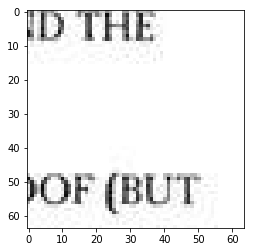

In [10]:
plt.imshow(x_train[1])

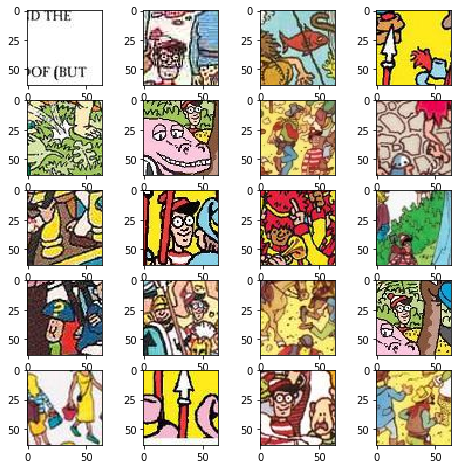

In [4]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i])

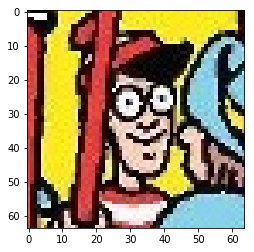

In [5]:
plt.imshow(x_train[10])

In [6]:
inputs = Input(shape=x_train.shape[1:])
outputs = Conv2D(32, (3, 3), activation='relu')(inputs)
outputs = MaxPool2D(pool_size=(2,2))(outputs)
outputs = Conv2D(32, (3, 3), activation='relu')(outputs)
outputs = MaxPool2D(pool_size=(2,2))(outputs)
outputs = Conv2D(32, (3, 3), activation='relu')(outputs)
outputs = MaxPool2D(pool_size=(2,2))(outputs)
outputs = Conv2D(32, (3, 3), activation='relu')(outputs)
outputs = MaxPool2D(pool_size=(2,2))(outputs)
outputs = Flatten()(outputs)
outputs = Dense(32, activation='relu')(outputs)
outputs = Dense(16, activation='relu')(outputs)
outputs = Dense(8, activation='relu')(outputs)
outputs = Dense(1, activation='sigmoid')(outputs)
model = Model(inputs=inputs, outputs=outputs)

In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
735/735 [==============================] - 3s 4ms/step - loss: 0.9589 - acc: 0.5333
Epoch 2/25
735/735 [==============================] - 0s 292us/step - loss: 0.6792 - acc: 0.6082
Epoch 3/25
735/735 [==============================] - 0s 303us/step - loss: 0.5620 - acc: 0.6912
Epoch 4/25
735/735 [==============================] - 0s 322us/step - loss: 0.5059 - acc: 0.7497
Epoch 5/25
735/735 [==============================] - 0s 292us/step - loss: 0.5481 - acc: 0.6966
Epoch 6/25
735/735 [==============================] - 0s 289us/step - loss: 0.4348 - acc: 0.8054
Epoch 7/25
735/735 [==============================] - 0s 293us/step - loss: 0.4087 - acc: 0.8068
Epoch 8/25
735/735 [==============================] - 0s 301us/step - loss: 0.3227 - acc: 0.8503
Epoch 9/25
735/735 [==============================] - 0s 292us/step - loss: 0.2620 - acc: 0.8939
Epoch 10/25
735/735 [==============================] - 0s 294us/step - loss: 0.3545 - acc: 0.8667
Epoch 11/25
735/735 [==========

In [8]:
print("Loss: %f, Accuracy: %f" % tuple(model.evaluate(x_test, y_test, verbose=0)))

Loss: 0.672904, Accuracy: 0.807163


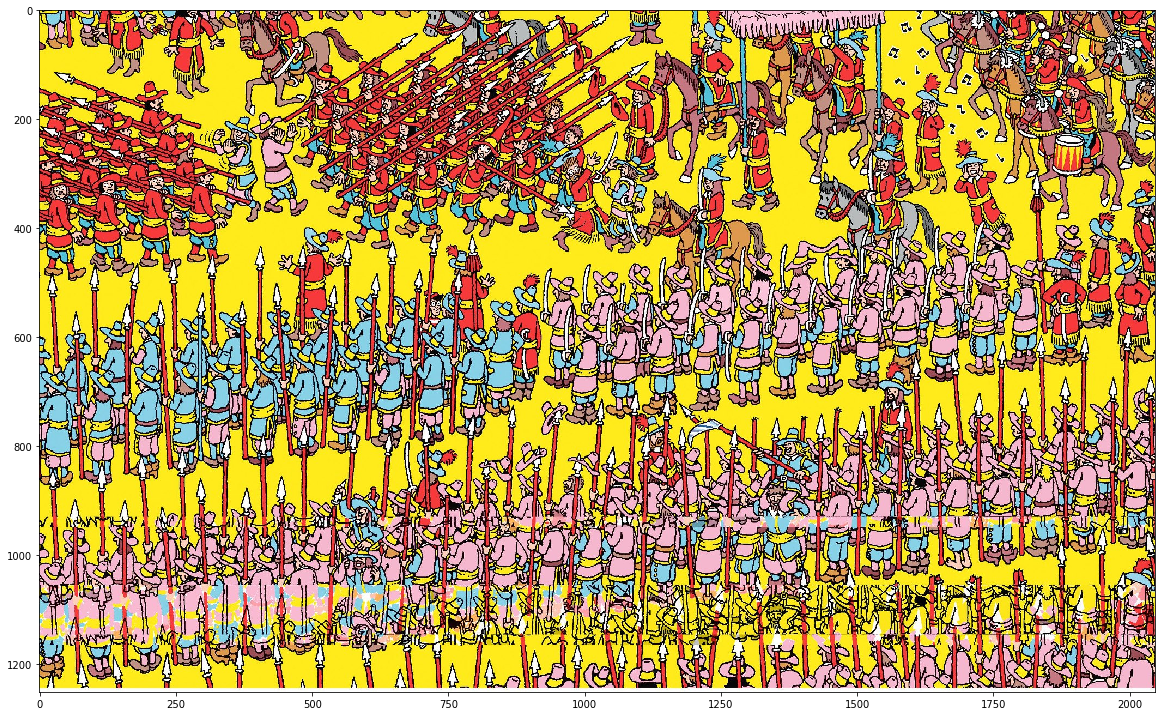

In [12]:
images = [cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB) for x in glob("data/original-images/*")]
fig, ax = plt.subplots(figsize = (20, 20))
ax.imshow(images[0])

In [13]:
print(model.predict(x_test))

[[4.08940723e-05]
 [2.64627131e-04]
 [9.99999523e-01]
 [9.02045667e-01]
 [6.33760691e-01]
 [3.96430865e-02]
 [1.52326241e-08]
 [9.99999762e-01]
 [6.77977296e-05]
 [9.99999881e-01]
 [9.99999166e-01]
 [1.09924106e-02]
 [9.61722732e-01]
 [8.68349429e-03]
 [5.95642999e-02]
 [2.35825777e-04]
 [1.36881587e-04]
 [9.12190199e-01]
 [5.53228019e-04]
 [9.99902129e-01]
 [9.99957085e-01]
 [9.00412738e-01]
 [3.90159758e-03]
 [9.98709440e-01]
 [9.88893926e-01]
 [4.34467763e-01]
 [9.99529958e-01]
 [9.96284604e-01]
 [9.86711442e-01]
 [2.23883800e-03]
 [1.18575129e-03]
 [9.99648213e-01]
 [1.32642416e-02]
 [1.70739591e-01]
 [9.99996066e-01]
 [9.99899149e-01]
 [9.80101466e-01]
 [7.55981356e-02]
 [9.98635113e-01]
 [1.05357058e-01]
 [9.99976993e-01]
 [9.99901056e-01]
 [9.99052346e-01]
 [4.30341561e-06]
 [9.99995351e-01]
 [1.00000000e+00]
 [9.99461830e-01]
 [6.12430610e-02]
 [3.58757712e-02]
 [7.30702102e-01]
 [1.26483850e-02]
 [9.88446474e-01]
 [9.72513974e-01]
 [9.99999881e-01]
 [2.00045342e-03]
 [3.483807

In [14]:
def sliding_windows(model, img):
    height, width, channels = img.shape
    window_h, window_w, window_c = model.input_shape[1:]
    output = np.zeros((math.ceil(img.shape[0]/window_h), math.ceil(img.shape[1]/window_w)))
    x = 0
    y = 0
    while y < height:
        while x < width:
            crop = img[y:min(y+window_h, height),x:min(x+window_w, width)]
            crop_h, crop_w, crop_c = crop.shape
            if(crop_h < window_h):
                upper = (window_h-crop_h)//2
                lower = window_h - crop_h - upper
                crop = np.pad(crop, ((upper, lower), (0,0), (0,0)), mode='constant')
            if(crop_w < window_w):
                left = (window_w-crop_w)//2
                right = window_w - crop_w - left
                crop = np.pad(crop, ((0,0), (left,right), (0,0)), mode='constant')
            output[y//window_h, x//window_w] = model.predict(np.expand_dims(crop, axis=0))
            x += window_w
        y += window_h
    return output
arr = sliding_windows(model, images[0])

In [37]:
def crop(model, img, windows):
    img_h, img_w, img_c = img.shape
    height, width, channels = model.input_shape[1:]
    x = windows.argmax(axis=1).max()
    y = windows.argmax(axis=1).argmax()
    return img[y*height:min(y*height + height, img_h), x*width: min(x*width+width, img_w)]
find_waldo = lambda model, img: crop(model, img, sliding_windows(model, img))

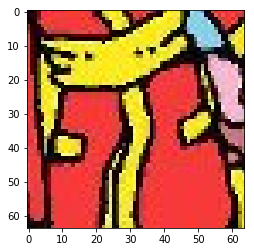

In [39]:
plt.imshow(find_waldo(model, images[0]))

In [29]:
arr.argmax(axis=1)

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [30]:
arr

array([[1.00503705e-04, 9.99996901e-01, 9.99999046e-01, 9.99991775e-01,
        1.34030864e-01, 1.82162907e-08, 9.98427749e-01, 1.18692124e-05,
        8.01554382e-01, 4.91191531e-06, 3.81382080e-07, 9.99987006e-01,
        3.89489979e-01, 9.98265088e-01, 1.68595672e-01, 2.65634656e-01,
        4.35097127e-06, 9.99668121e-01, 1.54815993e-07, 2.44221519e-06,
        7.98381952e-05, 1.11157342e-05, 2.12244238e-04, 4.25507169e-04,
        2.11635581e-03, 2.31309372e-07, 9.99996781e-01, 1.35186493e-01,
        9.70114470e-01, 5.09146571e-01, 2.94776843e-03, 9.99958038e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [ ]:
model.predict(np.expand_dims(find_waldo(model, images[1]), axis=0))